<a href="https://colab.research.google.com/github/Njaramba-Riri/Object-detection/blob/main/YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls "/content/drive/MyDrive"

'Advantages of Social Media.gdoc'   IMG20180902140425.jpg
 celine-sayuri-tagami-448870.jpg    IMG20180902140427.jpg
'Colab Notebooks'		    IMG20180902140434.jpg
'Concept Paper.pdf'		    IMG20180902140450.jpg
'Cover Letter.gdoc'		    IMG20180902140455.jpg
'dark spider.docx'		    IMG20180902140514.jpg
'Fee Statement (13).pdf'	    IMG20180902140516.jpg
'images (8).jpeg'		    IMG20180902165405.jpg
 IMG20171111141116.jpg		    IMG20180902165436.jpg
 IMG20171114145049.jpg		    IMG20180902165450.jpg
 IMG20171114145451-1.jpg	    IMG20180902165456.jpg
 IMG20171114150946.jpg		    IMG20180902165559.jpg
 IMG20180512105312.jpg		    IMG20180903123831.jpg
'IMG20180526125720 (1).jpg'	   'IMG20181104110535 (1).jpg'
 IMG20180526125720.jpg		    IMG20181104110535.jpg
 IMG20180526125740.jpg		    IMG_20190826_121132.jpg
 IMG20180527122025.jpg		    IMG_20190826_121158.jpg
 IMG20180527122031.jpg		    Img_dataset
 IMG20180527122054.jpg		   'internet influence.edited.docx'
 IMG20180527122113.jpg		   'James Riri 

In [7]:
!nvidia-smi

Tue Apr 18 05:14:19 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [8]:
!pip install -q kaggle

In [9]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ririnjaramba","key":"4d1fd51c1d3fb022adf272599a36e2d1"}'}

In [10]:
!mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [11]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
! kaggle datasets list

ref                                                               title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
salvatorerastelli/spotify-and-youtube                             Spotify and Youtube                                 9MB  2023-03-20 15:43:25           7455        278  1.0              
ppb00x/country-gdp                                                Country_GDP                                         7KB  2023-04-07 06:47:36            848         32  1.0              
erdemtaha/cancer-data                                             Cancer Data                                        49KB  2023-03-22 07:57:00           3001         72  1.0              
omartorres25/honda-data                                     

In [12]:
!kaggle datasets download -d antoreepjana/animals-detection-images-dataset

100% 8.89G/8.92G [01:12<00:00, 159MB/s]
100% 8.92G/8.92G [01:12<00:00, 132MB/s]


In [ ]:
! unzip animals-detection-images-dataset.zip 

Streaming output truncated to the last 5000 lines.
  inflating: test/Moths and butterflies/1e8ec426c4a420fa.jpg  
  inflating: test/Moths and butterflies/2599494df89a77c8.jpg  
  inflating: test/Moths and butterflies/2bd70d24d4f50ce8.jpg  
  inflating: test/Moths and butterflies/3275bab450450f46.jpg  
  inflating: test/Moths and butterflies/328e4b6ca39fa0f1.jpg  
  inflating: test/Moths and butterflies/39e3336fc0d65f91.jpg  
  inflating: test/Moths and butterflies/460a97a1742f99f4.jpg  
  inflating: test/Moths and butterflies/4e6ddd971888f2a7.jpg  
  inflating: test/Moths and butterflies/5111370d5ef62961.jpg  
  inflating: test/Moths and butterflies/5d42803fa334d34a.jpg  
  inflating: test/Moths and butterflies/5d7a6acce8b83d3d.jpg  
  inflating: test/Moths and butterflies/62c64d5696e88bbe.jpg  
  inflating: test/Moths and butterflies/6b28d7c41169069e.jpg  
  inflating: test/Moths and butterflies/6ca3c788b59abe88.jpg  
  inflating: test/Moths and butterflies/82f1770e23978fad.jpg  
  in

In [ ]:
from tensorflow import keras

In [16]:
train_ds=keras.utils.image_dataset_from_directory('/content/train',
                                                  validation_split=0.2,
                                                  subset='training',
                                                  seed=123,
                                                  batch_size=64,
                                                  image_size=(200,200))
val_ds=keras.utils.image_dataset_from_directory('/content/train',
                                                validation_split=0.2,
                                                subset="validation",
                                                seed=123,
                                                batch_size=32,
                                                image_size=(200,200))
test=keras.utils.image_dataset_from_directory('/content/test', batch_size=64, image_size=(200,200))

Found 22566 files belonging to 80 classes.
Using 18053 files for training.
Found 22566 files belonging to 80 classes.
Using 4513 files for validation.
Found 6505 files belonging to 80 classes.


In [17]:
class_names=train_ds.class_names
print(class_names)

['Bear', 'Brown bear', 'Bull', 'Butterfly', 'Camel', 'Canary', 'Caterpillar', 'Cattle', 'Centipede', 'Cheetah', 'Chicken', 'Crab', 'Crocodile', 'Deer', 'Duck', 'Eagle', 'Elephant', 'Fish', 'Fox', 'Frog', 'Giraffe', 'Goat', 'Goldfish', 'Goose', 'Hamster', 'Harbor seal', 'Hedgehog', 'Hippopotamus', 'Horse', 'Jaguar', 'Jellyfish', 'Kangaroo', 'Koala', 'Ladybug', 'Leopard', 'Lion', 'Lizard', 'Lynx', 'Magpie', 'Monkey', 'Moths and butterflies', 'Mouse', 'Mule', 'Ostrich', 'Otter', 'Owl', 'Panda', 'Parrot', 'Penguin', 'Pig', 'Polar bear', 'Rabbit', 'Raccoon', 'Raven', 'Red panda', 'Rhinoceros', 'Scorpion', 'Sea lion', 'Sea turtle', 'Seahorse', 'Shark', 'Sheep', 'Shrimp', 'Snail', 'Snake', 'Sparrow', 'Spider', 'Squid', 'Squirrel', 'Starfish', 'Swan', 'Tick', 'Tiger', 'Tortoise', 'Turkey', 'Turtle', 'Whale', 'Woodpecker', 'Worm', 'Zebra']


Visualizations

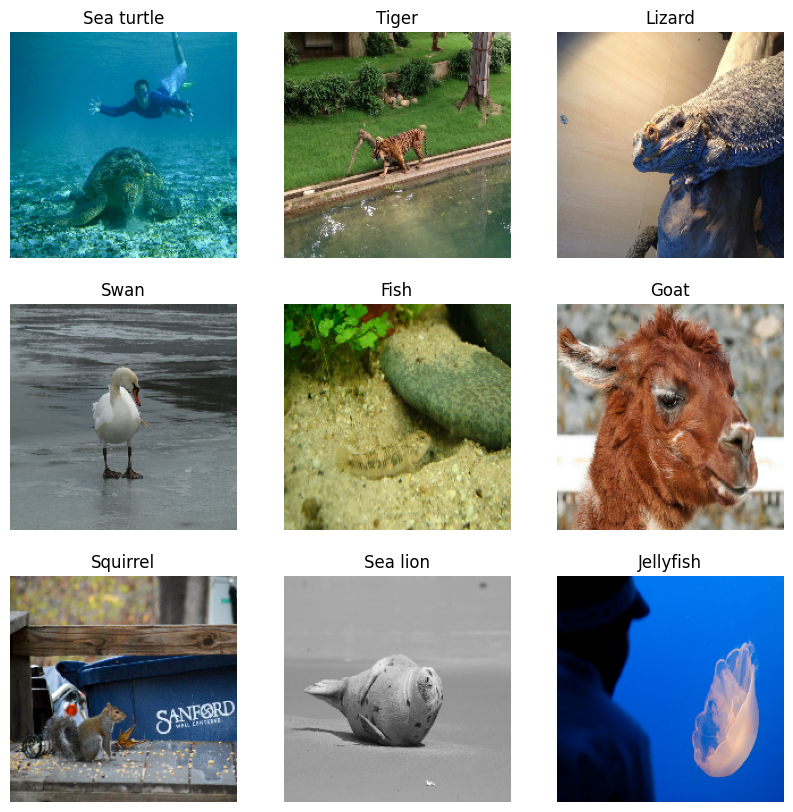

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(3):
  for i in range (9):
    ax=plt.subplot(330+i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

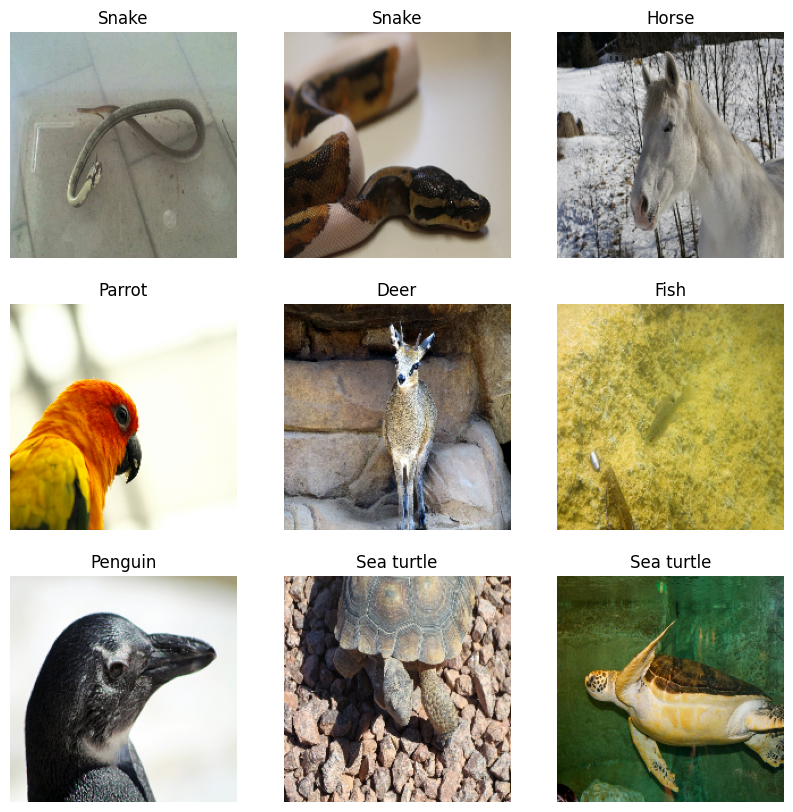

In [19]:
plt.figure(figsize=(10,10))
for images, labels in val_ds.take(3):
  for i in range(9):
    ax=plt.subplot(330+i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

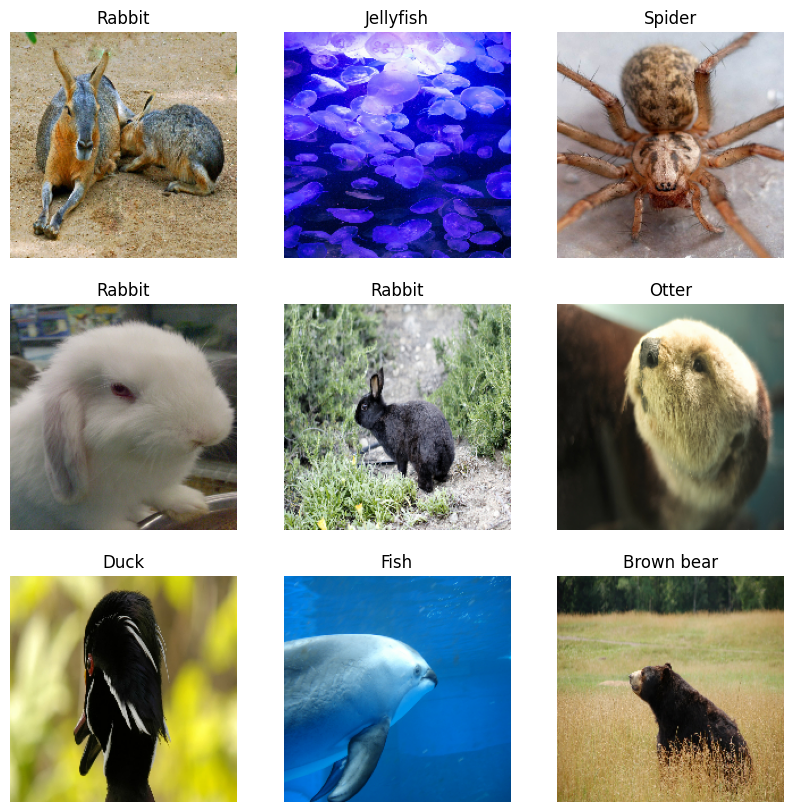

In [20]:
plt.figure(figsize=(10,10))
for images,labels in test.take(1):
  for i in range(9):
    plt.subplot(330+i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    label_names=test.class_names
    plt.title(label_names[labels[i]])
    plt.axis("off")

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.layers import RandomFlip, RandomRotation, Rescaling
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.constraints import MaxNorm
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical


In [3]:
data_augmentation=keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

NameError: ignored

In [ ]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(50):
  for i in range(9):
    aug_image=data_augmentation(images)
    ax=plt.subplot(330+i+1)
    plt.imshow(aug_image[4].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
plt.figure(figsize=(10,10))
for images,_ in test.take(1):
  for i in range(9):
    aug_image=data_augmentation(images)
    ax=plt.subplot(330+i+1)
    plt.imshow(aug_image[3].numpy().astype("uint8"))
    plt.axis("off")

In [1]:
num_classes=80

class_names=['Bear','Elephant','Koala','Penguin','Snake','Brown bear','Fish','Ladybug',
             'Bull','Fox','Leopard','Polar bear','Spider','Butterfly','Frog','Lion',
             'Rabbit','Squid','Camel','Giraffe','Lizard','Raccoon','Squirrel','Canary',
             'Goat','Lynx','Raven','Starfish','Caterpillar','Goldfish','Magpie',
             'Red panda','Swan','Cattle','Goose','Monkey','Rhinoceros','Tick',
             'Centipede','Hamster','Moths and butterflies','Scorpion','Tiger','Cheetah',
             'Harbor seal','Mouse','Seahorse','Tortoise','Chicken','Hedgehog','Mule',
             'Sea lion','Turkey','Crab','Hippopotamus','Ostrich','Sea turtle','Turtle',
             'Crocodile','Horse','Otter','Shark','Whale','Deer','Jaguar','Owl',
             'Sheep','Woodpecker','Duck','Jellyfish','Panda','Shrimp','Worm',
             'Eagle','Kangaroo','Parrot','Snail','Zebra']


In [2]:
(X_train, X_val), (y_train, y_val)=train

NameError: ignored

### Model Defifinition

In [3]:
model=Sequential()
model.add(Conv2D(32, (3,3), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

#compile the model
epochs=25
lrate=0.01
decay=lrate/epochs
sgd=SGD(learning_rate=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['acuracy'])
model.summary()

NameError: ignored